# Mnist example 

The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API. Therefore, I will start with the following two lines to import tensorflow and MNIST dataset under the Keras API.

# Import the data

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


If you do not have keras and tensorflow installed and you get an error you can install them via this commands: <br>
* '!pip install keras' 
* '!pip install tensorflow'

This is probably the most comon example in the field of image recognation, so most of the steps are very well prepared to us, such as the train and test split.

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Let look at the shape of the train_images:

In [3]:
train_images.shape

(60000, 28, 28)

There are 60 000 images in our data all of them are 28x28 pixels

Let look at the labels, that we are trying to predict:

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
import collections
import numpy as np

In [6]:
occurancies = collections.Counter(np.array(train_labels))

for key in sorted(occurancies.keys()) :
    print(key , " : " , occurancies[key])

0  :  5923
1  :  6742
2  :  5958
3  :  6131
4  :  5842
5  :  5421
6  :  5918
7  :  6265
8  :  5851
9  :  5949


This is an array (vector) with 0-9 numbers. This our labels for the images.

# Some basic plot to understand the data structure:

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline
from numpy.random import randint

## Plot some images with labels

In [8]:
columns = 5
rows = 5
randomNumbers = values = randint(0, 60000-1, columns * rows)
randomNumbers = randomNumbers
randomNumbers # the index of the images

array([54377, 12793, 44387,  3101, 56254, 45205, 40274, 36971, 53099,
       41750, 40436, 26498, 53794, 49494, 17790, 29431,  2337, 42588,
       37950, 16344,  7019, 43449, 21199, 15053,  5242])

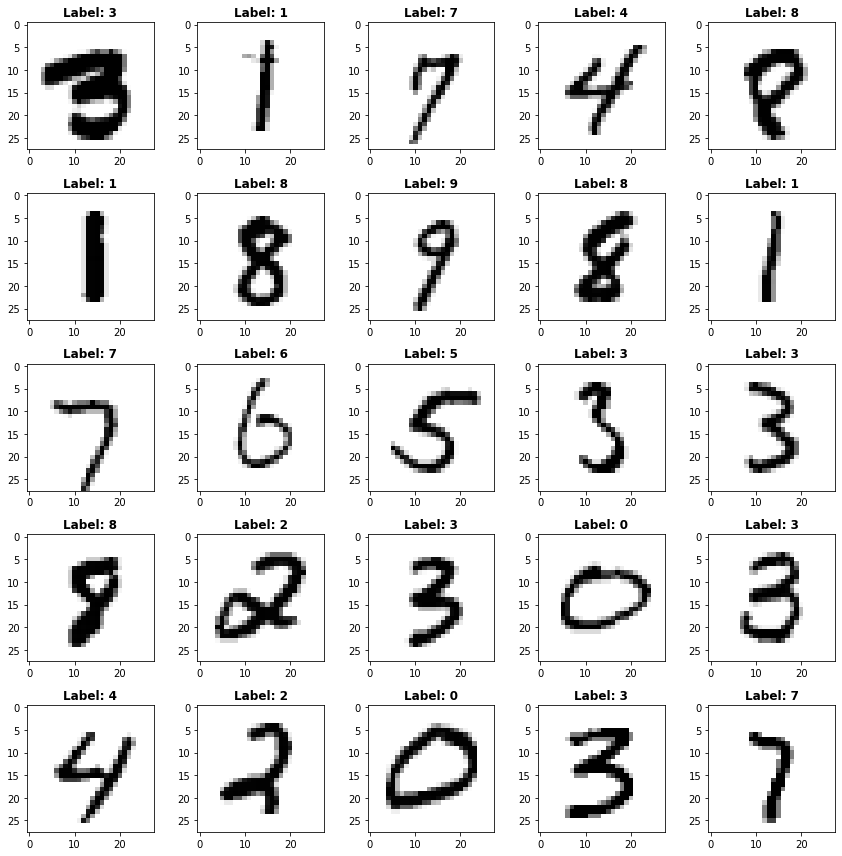

In [9]:
fig=plt.figure(figsize=(12, 12))

ax = []

for i in range(columns*rows):  
    
    ax.append(fig.add_subplot(rows, columns, i+1))
  
    plt.imshow(train_images[randomNumbers[i]], cmap=plt.cm.binary)
    plt.title("Label: " + str(train_labels[randomNumbers[i]]), fontweight="bold")    
    
plt.tight_layout()
plt.show()

# Modeling part

## Seting up the network architecture

In [10]:
from keras import models
from keras import layers

In [11]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax')) #number of output (0-9) = #10, softmax because of multiple labels

Here, our network consists of a sequence of two Dense layers, which are densely connected (also called fully connected) neural layers. The second (and last) layer is a 10-way softmax layer, which means it will return an array of 10 probability scores (summing to 1).

To make the network ready for training, we need to pick three more things, as part of the compilation step:
* A loss function—How the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.
* An optimizer—The mechanism through which the network will update itself based on the data it sees and its loss function.
* Metrics to monitor during training and testing—Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).

In [12]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Before training, we’ll preprocess the data by reshaping it into the shape the network expects and scaling it so that all values are in the [0, 1] interval.

In [13]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

We also need to categorically encode the labels. It is called one-hot encoding

In [14]:
from keras.utils import to_categorical

In [15]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [16]:
for i, n in enumerate(randomNumbers[0:5]):
    vector = np.array(train_labels[n])
    print(np.where(vector == 1)[0])
    print(vector)
    print('---')

[3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
---
[1]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
---
[7]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
---
[4]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
---
[8]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
---


We’re now ready to train the network, which in Keras is done via a call to the network’s fit method—we fit the model to its training data:

# Fit the model

In [17]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.2552 - accuracy: 0.9264
Epoch 2/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.1041 - accuracy: 0.9690
Epoch 3/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.0687 - accuracy: 0.9791
Epoch 4/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.0501 - accuracy: 0.9848 0s - loss: 0.0498 - accuracy: 
Epoch 5/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.0382 - accuracy: 0.9883


Two quantities are displayed during training: the loss of the network over the training
data, and the accuracy of the network over the training data

# Test it

We quickly reach an accuracy of 0.989 (98.9%) on the training data. Now let’s check that the model performs well on the test set, too:

In [18]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 31us/step


In [19]:
print('test_acc:', round(test_acc, 3))

test_acc: 0.98


The test-set accuracy turns out to be 97.8%—that’s quite a bit lower than the training set accuracy. This gap between training accuracy and test accuracy is an example of overfitting: the fact that machine-learning models tend to perform worse on new data than on their training data